<a href="https://colab.research.google.com/github/madia3/Basic_Statistics/blob/main/01_EDA_Sample_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA/Graphics Example
EDA의 중요성을 알 수 있는 간단한 예제를 살펴본다. (Anscombe Example)

*source : https://www.itl.nist.gov/div898/handbook/eda/section1/eda16.htm

### 0. 필요한 라이브러리 Load

In [ ]:
# 필요한 라이브러리 load
library(tidyverse)
install.packages('formattable')
library(formattable)
install.packages("patchwork")
library(patchwork)

### 1. 데이터 불러오기

In [102]:
# 데이터를 읽고, 변수명을 설정
data <- read.table("https://www.itl.nist.gov/div898/handbook/datasets/ANSCOMBE.DAT", header=FALSE, skip=25)
names(data) = c("X1", "Y1", "X2", "Y2", "X3", "Y3", "X4", "Y4")
data

X1,Y1,X2,Y2,X3,Y3,X4,Y4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,8.04,10,9.14,10,7.46,8,6.58
8,6.95,8,8.14,8,6.77,8,5.76
13,7.58,13,8.74,13,12.74,8,7.71
9,8.81,9,8.77,9,7.11,8,8.84
11,8.33,11,9.26,11,7.81,8,8.47
14,9.96,14,8.10,14,8.84,8,7.04
6,7.24,6,6.13,6,6.08,8,5.25
4,4.26,4,3.10,4,5.39,19,12.50
12,10.84,12,9.13,12,8.15,8,5.56


### 2. 요약통계값 확인(Summary Statistics)

In [105]:
Number_of_data = c(length(data$X1),length(data$X2),length(data$X3))
Mean_X = c(mean(data$X1), mean(data$X2), mean(data$X3))
Mean_Y = c(mean(data$Y1), mean(data$Y2), mean(data$Y3))
Correlation = c(cor(data$X1, data$Y1),cor(data$X2, data$Y2),cor(data$X3, data$Y3))
fit1=lm(Y1~X1, data);fit2=lm(Y2~X2, data);fit3=lm(Y3~X3, data)
Intercept = c(fit1$coefficients[1],fit2$coefficients[1],fit3$coefficients[1])
Slope = c(fit1$coefficients[2],fit2$coefficients[2],fit3$coefficients[2])
Summary = rbind(Number_of_data, Mean_X, Mean_Y, Correlation, Intercept, Slope)
colnames(Summary) = c("X1_Y1", "X2_Y2", "X3_Y3")
data.frame(Summary)

,X1_Y1,X2_Y2,X3_Y3
,<dbl>,<dbl>,<dbl>
Number_of_data,11.0000000,11.0000000,11.0000000
Mean_X,9.0000000,9.0000000,9.0000000
Mean_Y,7.5009091,7.5009091,7.5000000
Correlation,0.8164205,0.8162365,0.8162867
Intercept,3.0000909,3.0009091,3.0024545
Slope,0.5000909,0.5000000,0.4997273


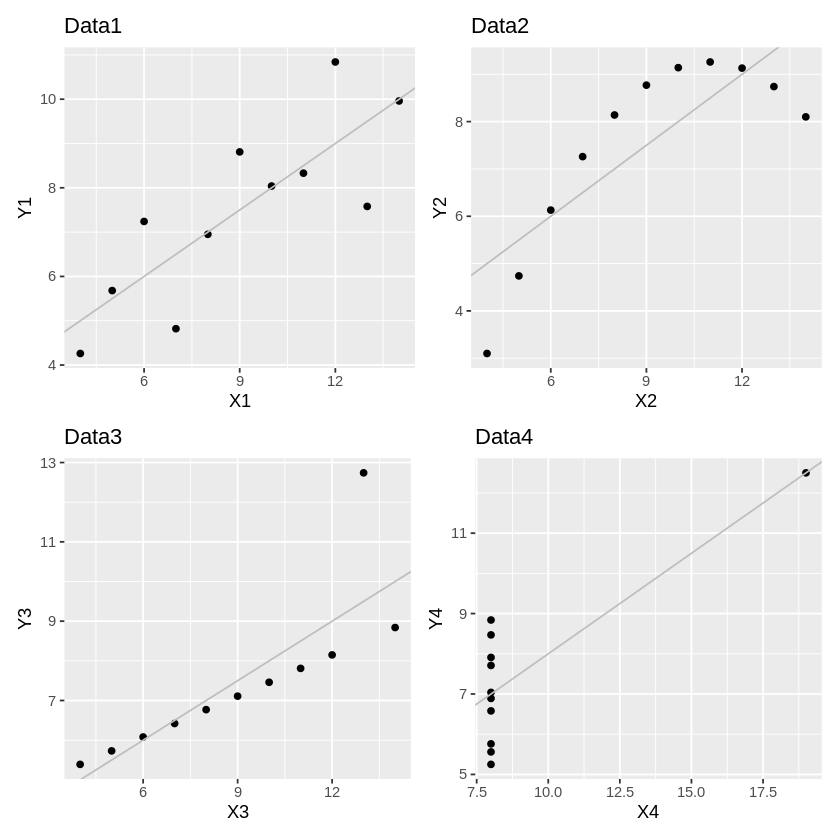

In [99]:
# 데이터1의 산점도
fig1=ggplot(data, aes(X1, Y1))+geom_point()+geom_abline(slope=0.5, intercept = 3, color="grey")+ggtitle("Data1")
# 데이터2의 산점도
fig2=ggplot(data, aes(X2, Y2))+geom_point()+geom_abline(slope=0.5, intercept = 3, color="grey")+ggtitle("Data2")
# 데이터3의 산점도
fig3=ggplot(data, aes(X3, Y3))+geom_point()+geom_abline(slope=0.5, intercept = 3, color="grey")+ggtitle("Data3")
# 데이터4의 산점도
fig4=ggplot(data, aes(X4, Y4))+geom_point()+geom_abline(slope=0.5, intercept = 3, color="grey")+ggtitle("Data4")
# 산점도 4개를 한 화면에 출력
(fig1+fig2)/(fig3+fig4)